<a href="https://colab.research.google.com/github/biku1998/NLP-Notebooks/blob/master/NLP_02_Topic_Modeling_SVD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Topic Modeling
   >In machine learning and natural language processing, a topic model is a type of statistical model for discovering the abstract "topics" that occur in a collection of documents. Topic modeling is a frequently used text-mining tool for discovery of hidden semantic structures in a text body.
- source : <a href = "https://en.wikipedia.org/wiki/Topic_model">Wikipedia</a>


##  Why we do topic modeling ?

>Large amounts of data are collected everyday. As more information becomes available, it becomes difficult to access what we are looking for. So, we need tools and techniques to organize, search and understand vast quantities of information.

>Topic modeling provides us with methods to organize, understand and summarize large collections of textual information.
> to put simply pros of topic modeling are
> - Discover hidden topical pattern in large text corpus
> - Annotating these documents topic wise

> **Also this is the first step we do when we have a large corpus.**

> **There was a famous case happened few years back `the leak of panama papers`**, the leak documents was nothing but huge text document containing conversations, discussions etc between different people, companies. **The newspaper agencies actually used topic modeling combined with NER-Named Entity recognition to extract quick insights from the large corpus**

In [0]:
from IPython.display import YouTubeVideo

* There are various approach to topic modeling we will see most of them one by one.

### **SVD**
   > * Singular value decomposition, also know as Latent Semantic Analysis (LSA)
   > * At a very high level it's a Matrix decomposition technique i.e splitting a Big Matrix into 3 smaller matrix such that those small matrices exhibits some interesting properties.
   > * SVD can be used for any data decomposition like images also.

**Understanding SVD**

<img src = "./SVD.png"></img>

[image source <a href = "https://research.fb.com/fast-randomized-svd/">Facebook research</a>]

The big Matrix (the blue one) has dimensions $m \times n$, this is the `source` matrix that we want to decompose, it can be a `document matrix`(we will see what this means), an `image`.
SVD will decompose our matrix in such a way that we will get 3 matrices.
   * The first matrix will be of dimension $m \times r$
   * The second matrix will be of dimension $r \times r$
   * The third one will be of dimension $r \times n$
   
<b>Understanding the dimensions and what they represent</b>

   Since we are doing topic modeling we will understand the dimensions and what they represent for the same.So `m` here is number of documents we have, `n` is the number of terms and the `r` here is a type of hyper-parameter we can tune which is no of concepts or topics we want to keep.

<b>Some properties of SVD </b>
- The most important matrix will be the last one from which we will extract topics
- SVD is exact decomposition. Meaning we can fully recover our original matrix [we will see how]
- SVD decomposition of any matrix is unique

<b> But why are we expecting something like this will work ? what's the point ?</b>

Let's take a much simpler case of integer `144` we can see that it's not a prime number but when we decompose or factorize it to $2 * 2 * 3 * 3 * 2 * 2 \rightarrow 144$ Here we see nice property that **all the factors are prime** which is a very special property to have for a number. <b>The same way if we break or decompose a matrix we will get different matrices with nice properties.</b>

* Most of the examples here are from a book called <a href = "https://nlp.stanford.edu/IR-book/html/htmledition/dropping-common-terms-stop-words-1.html"> Intro to Information Retrieval</a>

* The most useful resource to learn SVD is from someone is best at linear algebra who is non other than `Gilbert Strang`. I will recommend you to watch this video [`do not worry if you don't understand all of it, get a feel of what's the concept is all about`]

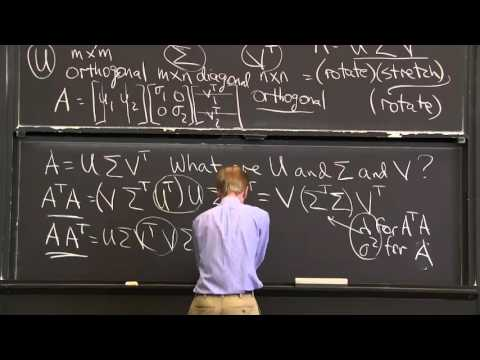

In [0]:
YouTubeVideo("mBcLRGuAFUk",width=650,height=320)

**Now let's implement SVD in different ways**

We will do 2-3 examples so that we get a proper idea of how to concepts are applied using different tools available.

### Demo 1 using sklearn fetch_20newsgroups dataset

In [0]:
# basic imports

import nltk
nltk.download('wordnet')
from nltk import stem

import spacy

import numpy as np
import matplotlib.pyplot as plt

from scipy import linalg

from sklearn.datasets import fetch_20newsgroups
from sklearn import decomposition
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

[nltk_data] Downloading package wordnet to /Users/biku/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [0]:
# load the data

# we will only work with 4 categories to keep things simple and easy to understand
categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']

# we will remove below attributes, as we only want articles text
remove = ('headers', 'footers', 'quotes')

# load the data for train and test mode
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories, remove=remove)
newsgroups_test = fetch_20newsgroups(subset='test', categories=categories, remove=remove)

In [0]:
# explore the data little bit

# how many data points we have ?
print(newsgroups_train.filenames.shape,newsgroups_train.target.shape)

(2034,) (2034,)


In [0]:
target_names = newsgroups_train.target_names
target_names

['alt.atheism', 'comp.graphics', 'sci.space', 'talk.religion.misc']

In [0]:
# look the some samples

idx = np.random.choice(2034)
# idx = 0

print(f"article / document : {newsgroups_train.data[idx]}\
        \n=================================\ncategory\
      : {target_names[newsgroups_train.target[idx]]}")

article / document : Hi,

I've noticed that if you only save a model (with all your mapping planes
positioned carefully) to a .3DS file that when you reload it after restarting
3DS, they are given a default position and orientation.  But if you save
to a .PRJ file their positions/orientation are preserved.  Does anyone
know why this information is not stored in the .3DS file?  Nothing is
explicitly said in the manual about saving texture rules in the .PRJ file. 
I'd like to be able to read the texture rule information, does anyone have 
the format for the .PRJ file?

Is the .CEL file format available from somewhere?

Rych        
category      : comp.graphics


In [0]:
# tokenize the data

# Bag of Words
vectorizer = CountVectorizer(stop_words='english')
# we will also get dense matrix instead of sparse. *Don't do this if corpus is very huge*
vectors = vectorizer.fit_transform(newsgroups_train.data).todense() 
vectors.shape # (documents,vocab)

(2034, 26576)

In [0]:
vectors[0].shape,vectors[0]

((1, 26576), matrix([[0, 0, 0, ..., 0, 0, 0]]))

In [0]:
# Tf- Idf

vectorizer_tfidf = TfidfVectorizer(stop_words='english')
# tf-idf matrix will be normalized and most stop words will be zero
vectors_tfidf = vectorizer_tfidf.fit_transform(newsgroups_train.data).todense()
vectors_tfidf.shape

(2034, 26576)

In [0]:
vectors_tfidf[0].shape,vectors_tfidf[0]

((1, 26576), matrix([[0., 0., 0., ..., 0., 0., 0.]]))

### We will do SVD using 2 approaches
   * Using scipy linear algebra library
   * using sklearn decomposition

**Using Scipy**

In [0]:
# bag of words 

U,s,Vh = linalg.svd(vectors,full_matrices = False)

In [0]:
# let's look at the shapes of all the results and see if all make sense
print(f"Input Matrix shape :{vectors.shape} ")
print(f"U shape (left one from the figure) : {U.shape}")
print(f"s shape (middle one) [this one will be a vector]: {s.shape}")
print(f"Vh shape (right one) : {Vh.shape}")

Input Matrix shape :(2034, 26576) 
U shape (left one from the figure) : (2034, 2034)
s shape (middle one) [this one will be a vector]: (2034,)
Vh shape (right one) : (2034, 26576)


**Observations**
- Scipy SVD has produced `2034` topics which is equal to the number of documents
- If you have done matrix math before we can easily see when we multiply all the 3 resultant matrix we can actually recover our original matrix.
To recover the input matrix we have to convert vector s into a matrix. By definition of SVD, vector s should be a diagonal matrix i.e non-zero elements at diagonal and zero everywhere else. But when scipy svd is performed it gives s as a vector not a matrix, may be to save memory. We can easily convert it into a matrix using numpy. Let's see how we can recover our original matrix.



In [0]:
# to understand what we are doing, let's do the same operation on a sample
a = np.array([1,2,3,4])
print(a)
# convert a into a diagonal matrix
np.diag(a)

[1 2 3 4]


array([[1, 0, 0, 0],
       [0, 2, 0, 0],
       [0, 0, 3, 0],
       [0, 0, 0, 4]])

In [0]:
# the same thing we will do with that s vector

new_s = np.diag(s)

# recover the original matrix

recovered_matrix = U @ new_s @ Vh # a hack in numpy to do matrix multiplication

print("Here, look we got our original matrix back")
recovered_matrix.shape

Here, look we got our original matrix back


(2034, 26576)

Okay but how do we get the topics ?
- we have observed that scipy SVD gives us the same no of topic as no of documents we give.
- But not all topics will be useful. So how do we know what's useful ?
    - the interesting this is that `s` matrix is a diagonal matrix whose diagonal elements are in decreasing order. We can plot `s` and see up to what number the values are high

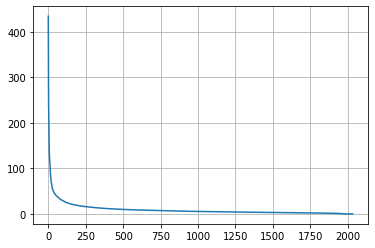

In [0]:
plt.plot(s)
plt.grid()
plt.show()

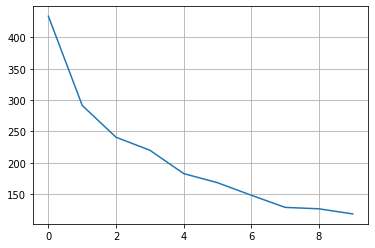

In [0]:
# highy skewed,  we have to look closely

plt.plot(s[:10])
plt.grid()
plt.show()

Okay so looks like till `8` we have large values.

In [0]:
# getting our topics

# we also have to choose no of words required to represent a topic
no_of_words =8

no_of_topics = 8


# to select the words we first need all the words

vocab = np.array(vectorizer.get_feature_names())

print(len(vocab))

# look at some samples
print(vocab[8000:8010])

26576
['detects' 'deter' 'deteriorated' 'deterioration' 'determinant'
 'determination' 'determinations' 'determine' 'determined' 'determines']


So now we can print topics discovered by SVD by
 - taking our vocab and vocab importance vector i.e each row of Vh packing them together
 - sorting the packed vectors by importance i.e Vh
 - Once sorted we will take first n words that will represent the entire document
 - print them

In [0]:
def print_topics(Vh,vocab,no_of_words,no_of_topics,verbose = False):
    
    if verbose:
        print(f"vocab shape : {vocab.shape}")
    for i,v in enumerate(Vh):
        # stick the words and v together
        vocab_components = zip(vocab,v)
        
        if verbose:
            print(f"vh shape : {v.shape}")
            
        # sort the vocab components according to the importance that is captured in v
        sorted_components = sorted(vocab_components,key = lambda x:x[1],reverse = True)\
                                                                            [:no_of_words]
        if i <= no_of_topics:
            print("document : ",i)
            print("topics found in the document are :: ")
            for c in sorted_components:
                print(c[0])
            print("="*70)
        else:
            break           

In [0]:
print_topics(Vh,vocab,no_of_words,no_of_topics)

document :  0
topics found in the document are :: 
critus
ditto
propagandist
surname
galacticentric
kindergarten
surreal
imaginative
document :  1
topics found in the document are :: 
jpeg
gif
file
color
quality
image
jfif
format
document :  2
topics found in the document are :: 
graphics
edu
pub
mail
128
3d
ray
ftp
document :  3
topics found in the document are :: 
jesus
god
matthew
people
atheists
atheism
does
graphics
document :  4
topics found in the document are :: 
image
data
processing
analysis
software
available
tools
display
document :  5
topics found in the document are :: 
god
atheists
atheism
religious
believe
religion
argument
true
document :  6
topics found in the document are :: 
space
nasa
lunar
mars
probe
moon
missions
probes
document :  7
topics found in the document are :: 
image
probe
surface
lunar
mars
probes
moon
orbit
document :  8
topics found in the document are :: 
argument
fallacy
conclusion
example
true
ad
argumentum
premises


In [0]:
# let's do the same process with tf-idf 

# the same code will be repeated .. 

U,s,Vh = linalg.svd(vectors_tfidf,full_matrices = False)

# let's look at the shapes of all the results and see if all make sense
print(f"Input Matrix shape :{vectors.shape} ")
print(f"U shape (left one from the figure) : {U.shape}")
print(f"s shape (middle one) [this one will be a vector]: {s.shape}")
print(f"Vh shape (right one) : {Vh.shape}")

# the same thing we will do with that s vector

new_s = np.diag(s)

# recover the original matrix

recovered_matrix = U @ new_s @ Vh # a hack in numpy to do matrix multiplication

print("Here, look we got our original matrix back")
recovered_matrix.shape

Input Matrix shape :(2034, 26576) 
U shape (left one from the figure) : (2034, 2034)
s shape (middle one) [this one will be a vector]: (2034,)
Vh shape (right one) : (2034, 26576)
Here, look we got our original matrix back


(2034, 26576)

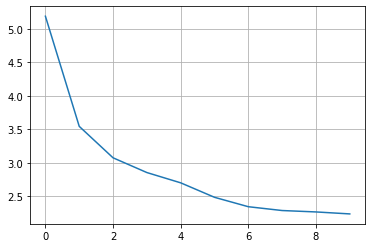

In [0]:
plt.plot(s[:10])
plt.grid()
plt.show()

In [0]:
print_topics(Vh,vocab,no_of_words,no_of_topics)

document :  0
topics found in the document are :: 
critus
ditto
asg
collegue
do_sphere
fiddled
n4
pnp
document :  1
topics found in the document are :: 
space
graphics
thanks
program
files
image
nasa
ftp
document :  2
topics found in the document are :: 
space
nasa
launch
shuttle
moon
orbit
lunar
station
document :  3
topics found in the document are :: 
ico
bobbe
tek
beauchaine
bronx
manhattan
sank
queens
document :  4
topics found in the document are :: 
objective
think
morality
don
just
people
moral
values
document :  5
topics found in the document are :: 
objective
morality
values
moral
god
science
space
subjective
document :  6
topics found in the document are :: 
graphics
comp
god
software
group
objective
aspects
edu
document :  7
topics found in the document are :: 
image
file
cview
graphics
data
use
just
images
document :  8
topics found in the document are :: 
jesus
objective
christ
christian
software
christians
bible
did


**Using Sklearn decomposition**
- Sklearn implements an improved version of SVD which is truncated svd

In [0]:
from sklearn.decomposition import TruncatedSVD

In [0]:
# get the instance

truc_svd = TruncatedSVD(n_components = 200,n_iter = 10)

# fit the tf-idf term document matrix
truc_svd.fit(vectors_tfidf)

TruncatedSVD(algorithm='randomized', n_components=200, n_iter=10,
             random_state=None, tol=0.0)

In [0]:
# get our Vh matrix

Vh = truc_svd.components_

In [0]:
print_topics(Vh,vocab,no_of_words,no_of_topics)

document :  0
topics found in the document are :: 
god
people
don
just
think
space
know
like
document :  1
topics found in the document are :: 
space
graphics
thanks
program
files
image
nasa
ftp
document :  2
topics found in the document are :: 
space
nasa
launch
shuttle
moon
orbit
lunar
station
document :  3
topics found in the document are :: 
ico
bobbe
tek
beauchaine
bronx
manhattan
sank
queens
document :  4
topics found in the document are :: 
god
jesus
space
bible
satan
atheism
believe
christ
document :  5
topics found in the document are :: 
objective
morality
values
moral
god
science
space
subjective
document :  6
topics found in the document are :: 
graphics
comp
god
software
group
objective
aspects
edu
document :  7
topics found in the document are :: 
thanks
know
space
does
advance
mail
looking
anybody
document :  8
topics found in the document are :: 
atheism
just
files
god
atheists
space
file
cview
